In [1]:
"""
패션 분류 문제
(출처) https://www.tensorflow.org/tutorials/keras/classification?hl=ko
"""

'\n패션 분류 문제\n(참고) https://www.tensorflow.org/tutorials/keras/classification?hl=ko\n'

In [3]:
# tensorflow와 tf.keras를 import
import tensorflow as tf
from tensorflow import keras
# 추가로 필요한 패키지를 import
import numpy as np
import matplotlib.pyplot as plt

print('Tensorflow 버전 : ', tf.__version__)

Tensorflow 버전 :  2.5.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) \
= fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# 데이터 살펴보기
print(train_images.shape)

(60000, 28, 28)


In [7]:
# 데이터 살펴보기
print(len(train_labels))

60000


In [8]:
# 데이터 살펴보기
print(train_labels)

[9 0 0 ... 3 0 5]


In [9]:
# 데이터 살펴보기
print(test_images.shape)

(10000, 28, 28)


In [10]:
# 데이터 살펴보기
print(len(test_labels))

10000


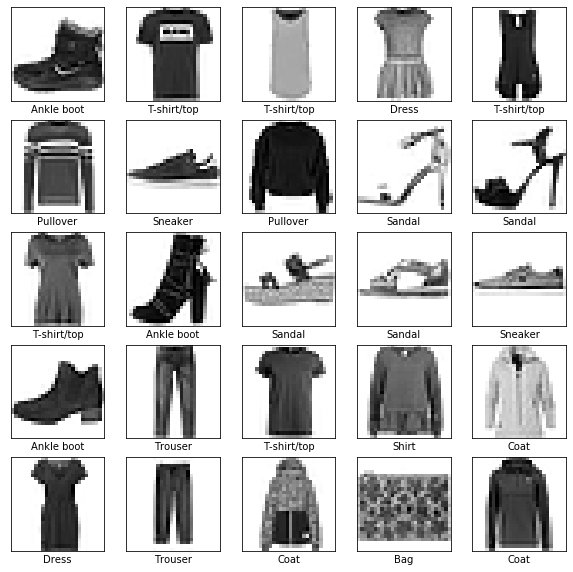

In [11]:
# 데이터 그림으로 출력하기

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

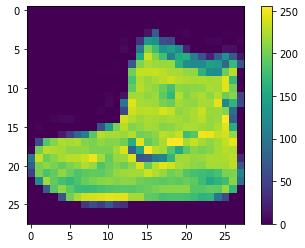

In [12]:
# 데이터 전처리
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
# 신경망 모델 만들기

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
# 신경망 모델 컴파일

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# 신경망 훈련하기

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 625us/step - loss: 0.5062 - accuracy: 0.8236
Epoch 2/5
1875/1875 [==============================] - 1s 613us/step - loss: 0.3799 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 1s 614us/step - loss: 0.3373 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 1s 606us/step - loss: 0.3129 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 1s 613us/step - loss: 0.2938 - accuracy: 0.8908


In [16]:
# 훈련된 모델 정확도 평가하기

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3358 - accuracy: 0.8794
테스트 정확도: 0.8794000148773193


In [17]:
# 예측하기

predictions = model.predict(test_images)
print(np.argmax(predictions[0]))  # 예측 결과
print(test_labels[0])  # 실제 결과

9
9


In [18]:
# 예측하기
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

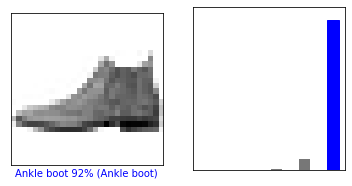

In [19]:
# 예측 결과 출력하기
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

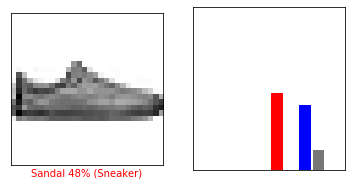

In [20]:
# 예측 결과 출력하기
# 12번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

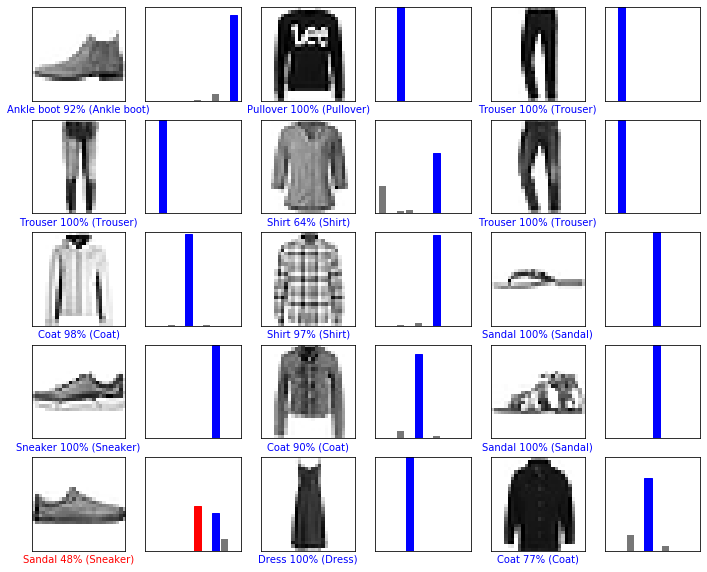

In [21]:
# 예측 결과 출력하기
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Ankle boot


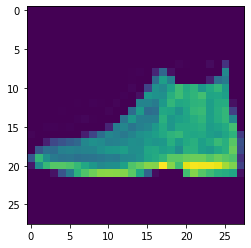

In [22]:
# 하나의 이미지에 대한 예측하기

# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]
#print(img.shape)

# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))
#print(img.shape)

# 예측 하기
predictions_single = model.predict(img)
#print(predictions_single)
#print(np.argmax(predictions_single[0]))
pred_index = np.argmax(predictions_single[0])
print(class_names[pred_index])

plt.figure()
plt.imshow(test_images[0])
plt.show()